### Reading data

In [1]:
from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork

data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)

### Eigendecompostion

In [2]:
k = 1
L1 = sc.hodge_laplacian_matrix(rank=k)
L1U = sc.upper_laplacian_matrix(rank=k)
L1L = sc.lower_laplacian_matrix(rank=k)
L1

array([[ 3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  3.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  3.,  1., -1.,  0.,  0.,  0.],
       [ 0., -1.,  0., -1.,  1.,  2.,  0.,  1.,  0., -1.],
       [ 0.,  0., -1.,  0., -1.,  0.,  2., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -1.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  3.]], dtype=float32)

In [3]:
import numpy as np
from sclibrary.eigendecomposition import (get_harmonic_eigenvectors, 
                                          get_curl_eigenvectors, 
                                          get_gradient_eigenvectors,
                                          )


u_h, eigenvals_h = get_harmonic_eigenvectors(L1)
u_c, eigenvals_c = get_curl_eigenvectors(L1U)
u_g, eigenvals_g = get_gradient_eigenvectors(L1L)

In [4]:
print("Eigenvalues:", eigenvals_h)
u_h

Eigenvalues: [0.0]


array([[ 0.06889728],
       [ 0.13779457],
       [-0.20669185],
       [ 0.06889728],
       [-0.34448642],
       [ 0.5511783 ],
       [-0.5511783 ],
       [-0.36745217],
       [-0.18372609],
       [ 0.18372609]], dtype=float32)

In [5]:
print("Eigenvalues:", eigenvals_c)
u_c

Eigenvalues: [2.0, 4.0, 3.0]


array([[ 5.0000000e-01, -3.5355338e-01,  0.0000000e+00],
       [-1.5010741e-16,  7.0710677e-01,  0.0000000e+00],
       [-5.0000000e-01, -3.5355338e-01,  0.0000000e+00],
       [ 5.0000000e-01, -3.5355338e-01,  0.0000000e+00],
       [ 5.0000000e-01,  3.5355338e-01,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -5.7735026e-01],
       [ 0.0000000e+00,  0.0000000e+00,  5.7735026e-01],
       [ 0.0000000e+00,  0.0000000e+00, -5.7735026e-01]], dtype=float32)

In [6]:
print("Eigenvalues:", eigenvals_g)
u_g

Eigenvalues: [(5.4881153+0j), (4.4575295+0j), (2.3280091+0j), (3.5980895+0j), (3.3139076+0j), (0.81434923+0j)]


array([[-0.05878212+0.j, -0.36745653+0.j,  0.48619685+0.j,
        -0.46687335+0.j, -0.09433983+0.j,  0.13607138+0.j],
       [ 0.32946974+0.j, -0.47395313+0.j,  0.0652547 +0.j,
        -0.10648241+0.j, -0.3128003 +0.j, -0.1854457 +0.j],
       [-0.1462567 +0.j, -0.5355788 +0.j, -0.3267199 +0.j,
        -0.279232  +0.j, -0.02961399+0.j, -0.29740456+0.j],
       [ 0.38825187+0.j, -0.10649659+0.j, -0.42094216+0.j,
         0.36039096+0.j, -0.21846044+0.j, -0.32151708+0.j],
       [-0.47572643+0.j, -0.06162565+0.j, -0.3919746 +0.j,
        -0.17274958+0.j,  0.2831863 +0.j, -0.11195885+0.j],
       [-0.4902889 +0.j,  0.2168476 +0.j,  0.10910526+0.j,
        -0.04279641+0.j, -0.21460989+0.j, -0.5907652 +0.j],
       [ 0.3051214 +0.j,  0.4131654 +0.j,  0.26664403+0.j,
        -0.2998677 +0.j, -0.08504377+0.j, -0.51395106+0.j],
       [-0.31968388+0.j, -0.13469216+0.j,  0.23443583+0.j,
         0.42982084+0.j, -0.4127524 +0.j,  0.03514474+0.j],
       [-0.12263153+0.j, -0.28346965+0.j,  0.396

### Simplical Shifting

[(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (2, 5), (3, 4), (4, 5), (4, 6), (5, 6)]


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:143: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


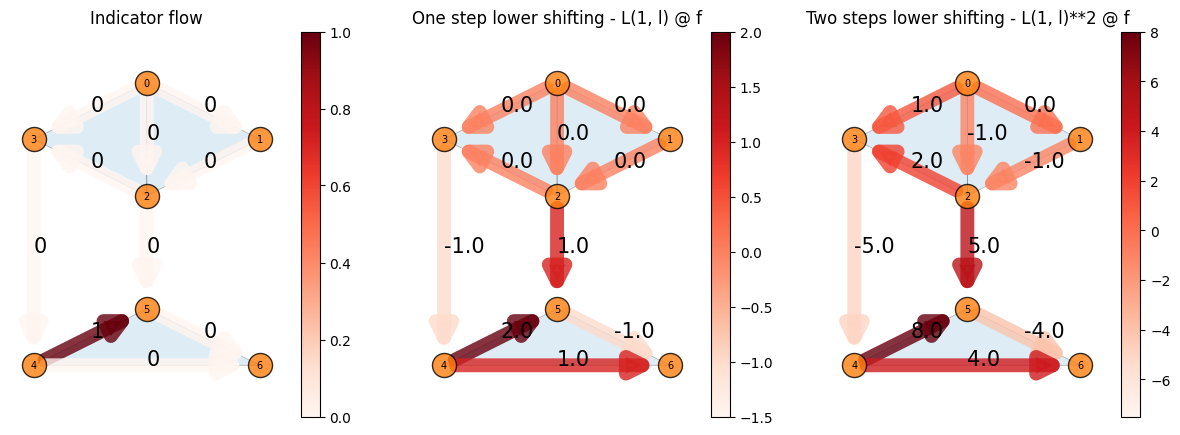

In [117]:
from sclibrary.plot import SCPlot
from matplotlib import pyplot as plt

# get edge labels
edge_labels = {}
for i in range(len(sc.edges)):
    edge_labels[sc.edges[i][0], sc.edges[i][1]] = round(u_c[i][0], 2)

# create plot
scplot = SCPlot(sc=sc, pos=coordinates)

fig = plt.figure(figsize = (15,5))
print(sc.edges)
# indicator flow f
ax = fig.add_subplot(1, 3, 1)
ax.set_title("Indicator flow")
synthetic_flow = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
scplot.draw_flow(flow=synthetic_flow, ax=ax)

# one step lower shifting
ax = fig.add_subplot(1, 3, 2)
ax.set_title("One step lower shifting - L(1, l) @ f")
flow = sc.lower_laplacian_matrix(rank=1) @ synthetic_flow
scplot.draw_flow(flow=flow, ax=ax)

# two steps lower shifting
ax = fig.add_subplot(1, 3, 3)
ax.set_title("Two steps lower shifting - L(1, l)**2 @ f")
lower_flow = sc.lower_laplacian_matrix(rank=1) @ sc.lower_laplacian_matrix(rank=1).T @ synthetic_flow
scplot.draw_flow(flow=lower_flow, ax=ax)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:143: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


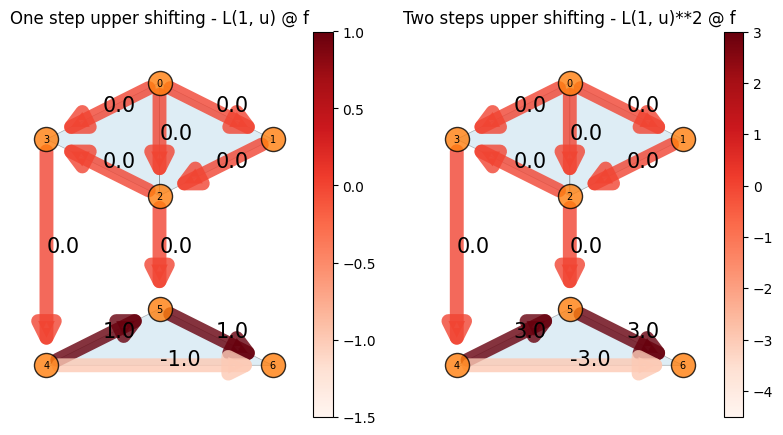

In [118]:
fig = plt.figure(figsize = (15,5))

# one step upper shifting
ax = fig.add_subplot(1, 3, 1)
ax.set_title("One step upper shifting - L(1, u) @ f")
flow = sc.upper_laplacian_matrix(rank=1) @ synthetic_flow
scplot.draw_flow(flow=flow, ax=ax)

# two steps upper shifting
ax = fig.add_subplot(1, 3, 2)
ax.set_title("Two steps upper shifting - L(1, u)**2 @ f")
upper_flow = sc.upper_laplacian_matrix(rank=1) @ sc.upper_laplacian_matrix(rank=1).T @ synthetic_flow
scplot.draw_flow(flow=upper_flow, ax=ax)

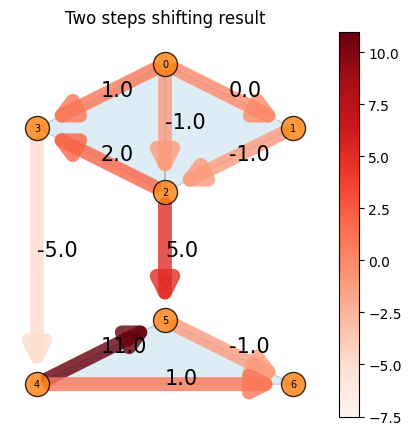

In [121]:
# two step shifting result L1^2 @ f
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Two steps shifting result")
flow = lower_flow + upper_flow
scplot.draw_flow(flow=flow, ax=ax)

### Filters

In [14]:
from sclibrary.eigendecomposition import _get_eigendecomposition
from scipy.linalg import pinv

L = 10 # order of the filter (order of the matrix polynomial)

eigenvecs, eigenvals = _get_eigendecomposition(L1)

lam_l = np.diag(eigenvals) # eigenvalues of L1 (all of them)

Phi_G = np.array([lam_l ** (l - 1) for l in range(1, L + 1)]).T

# Calculate alpha
alpha = pinv(Phi_G) @ np.concatenate([np.array([1]), np.zeros(len(lam_l) - 1)])

# Build the filter
H = np.zeros((7, 7))
for l in range(1, L+1):
    H += alpha[l-1] * L1L**(l-1)
    
H

ValueError: expected matrix

In [10]:
# flow geenration
flow = np.random.rand(L1.shape[0], 1)
print("flow", flow)
# analyze frequency components

# spectral decomposition - not flow
flow_h = u_h.T @ flow # coefficients of the flow in the harmonic basis
flow_g = u_g.T @ flow # coefficients of the flow in the gradient basis
flow_c = u_c.T @ flow # coefficients of the flow in the curl basis
print("flow_h", flow_h)
print("flow_g", flow_g)
print("flow_c", flow_c)

flow [[0.11450893]
 [0.31080368]
 [0.21274476]
 [0.15173042]
 [0.41463632]
 [0.97363966]
 [0.04415734]]
flow_h [[-0.21244589]]
flow_g [[-0.78770249]
 [ 0.17252394]
 [ 0.33230129]
 [-0.36227225]]
flow_c [[-0.40795272]
 [ 0.44314471]]
